In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data

df=pd.read_csv('Annthyroid_02_v01.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

att1  att2  att3  att4  att5  att6  att7  att8  att9  att10   ...     \
0  0.73   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0   ...      
1  0.24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      
2  0.47   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      
3  0.64   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      
4  0.23   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   ...      

   att13  att14  att15  att16    att17  att18  att19  att20  att21  outlier  
0    0.0    0.0    0.0    0.0  0.00060  0.015  0.120  0.082  0.146        0  
1    0.0    0.0    0.0    0.0  0.00025  0.030  0.143  0.133  0.108        0  
2    0.0    0.0    0.0    0.0  0.00190  0.024  0.102  0.131  0.078        0  
3    0.0    0.0    0.0    0.0  0.00090  0.017  0.077  0.090  0.085        0  
4    0.0    0.0    0.0    0.0  0.00025  0.026  0.139  0.090  0.153        0  

[5 rows x 22 columns]

In [3]:
df.shape

(6802, 22)

In [4]:
# df to values
df = df.values

In [5]:
# Deep ExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/Annthyroid.json")  
gc = GCForest(config)

In [6]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,21]
X = df[:,0:21]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# count class
len(np.unique(y_train))

2

In [8]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-28 11:32:49,520][cascade_classifier.fit_transform] X_groups_train.shape=[(4761, 21)],y_train.shape=(4761,),X_groups_test.shape=[(2041, 21)],y_test.shape=(2041,)
[ 2018-07-28 11:32:49,521][cascade_classifier.fit_transform] group_dims=[21]
[ 2018-07-28 11:32:49,523][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 11:32:49,524][cascade_classifier.fit_transform] group_ends=[21]
[ 2018-07-28 11:32:49,525][cascade_classifier.fit_transform] X_train.shape=(4761, 21),X_test.shape=(2041, 21)
[ 2018-07-28 11:32:49,526][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 21), X_cur_test.shape=(2041, 21)
[ 2018-07-28 11:32:50,064][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:32:50,791][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.79%
[ 2018-07-28 11:32:51,656][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 11:32:56,961][cascade_classifier.transform] X_groups_test.shape=[(2041, 21)]
[ 2018-07-28 11:32:56,963][cascade_classifier.transform] group_dims=[21]
[ 2018-07-28 11:32:56,964][cascade_classifier.transform] X_test.shape=(2041, 21)
[ 2018-07-28 11:32:56,965][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2041, 21)


Test Accuracy of CascadeExtraTrees = 98.971093 %
[[2000    2]
 [  19   20]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      2002
        1.0       0.91      0.51      0.66        39

avg / total       0.99      0.99      0.99      2041



In [10]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-28 11:32:58,955][cascade_classifier.transform] X_groups_test.shape=[(2041, 21)]
[ 2018-07-28 11:32:58,957][cascade_classifier.transform] group_dims=[21]
[ 2018-07-28 11:32:58,957][cascade_classifier.transform] X_test.shape=(2041, 21)
[ 2018-07-28 11:32:58,958][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2041, 21)


In [11]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [12]:
X_test_new.shape

(2041, 23)

In [13]:
X_train_new.shape

(4761, 23)

In [14]:
# Cascade ExtraTrees
config = load_json("./examples/Annthyroidgc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-28 11:33:01,098][cascade_classifier.fit_transform] X_groups_train.shape=[(4761, 23)],y_train.shape=(4761,),X_groups_test.shape=[(2041, 23)],y_test.shape=(2041,)
[ 2018-07-28 11:33:01,099][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-28 11:33:01,100][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 11:33:01,101][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-28 11:33:01,102][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:33:01,103][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)
[ 2018-07-28 11:33:01,604][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.37%
[ 2018-07-28 11:33:02,208][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-28 11:33:02,925][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 

[ 2018-07-28 11:33:32,334][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=99.37%
[ 2018-07-28 11:33:33,067][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=98.53%
[ 2018-07-28 11:33:33,786][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:33:34,500][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=99.37%
[ 2018-07-28 11:33:35,223][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:33:35,959][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.58%
[ 2018-07-28 11:33:36,687][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.79%
[ 2018-07-28 11:33:37,525][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=99.16%


In [15]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 11:33:53,901][cascade_classifier.transform] X_groups_test.shape=[(2041, 23)]
[ 2018-07-28 11:33:53,902][cascade_classifier.transform] group_dims=[23]
[ 2018-07-28 11:33:53,903][cascade_classifier.transform] X_test.shape=(2041, 23)
[ 2018-07-28 11:33:53,904][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2041, 23)
[ 2018-07-28 11:33:55,411][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(2041, 25)
[ 2018-07-28 11:33:57,277][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(2041, 25)
[ 2018-07-28 11:33:59,583][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(2041, 25)


Test Accuracy of CascadeExtraTrees = 99.314062 %
[[1995    7]
 [   7   32]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2002
        1.0       0.82      0.82      0.82        39

avg / total       0.99      0.99      0.99      2041



In [16]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/Annthyroidgc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")  

[ 2018-07-28 11:34:01,741][cascade_classifier.fit_transform] X_groups_train.shape=[(4761, 23)],y_train.shape=(4761,),X_groups_test.shape=[(2041, 23)],y_test.shape=(2041,)
[ 2018-07-28 11:34:01,742][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-28 11:34:01,743][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 11:34:01,744][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-28 11:34:01,745][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:34:01,746][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)
[ 2018-07-28 11:34:02,245][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:34:02,959][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-28 11:34:03,675][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 

[ 2018-07-28 11:34:30,875][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=99.16%
[ 2018-07-28 11:34:31,589][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=98.11%
[ 2018-07-28 11:34:32,189][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=98.74%
[ 2018-07-28 11:34:32,790][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=98.95%
[ 2018-07-28 11:34:33,510][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=98.53%
[ 2018-07-28 11:34:34,354][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:34:35,217][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.58%
[ 2018-07-28 11:34:36,315][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=99.16%


('Test Accuracy of CascadeExtraTrees = 99.461049 %', 'Layer :', 0)
[[1998    4]
 [   7   32]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2002
        1.0       0.89      0.82      0.85        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '35.726', ' seconds')


[ 2018-07-28 11:34:42,026][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:34:42,772][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.16%
[ 2018-07-28 11:34:43,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.37%
[ 2018-07-28 11:34:44,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.74%
[ 2018-07-28 11:34:44,918][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.95%
[ 2018-07-28 11:34:45,634][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.53%
[ 2018-07-28 11:34:46,234][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.74%
[ 2018-07-28 11:34:46,834][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.74%


[ 2018-07-28 11:35:16,987][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:35:17,588][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.95%
[ 2018-07-28 11:35:18,539][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.95%
[ 2018-07-28 11:35:19,273][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.16%
[ 2018-07-28 11:35:19,378][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.91%
[ 2018-07-28 11:35:19,379][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.36%
[ 2018-07-28 11:35:19,380][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.91%
[ 2018-07-28 11:35:19,381][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.36%
[ 2018-07-28 11:35:19,382][

('Test Accuracy of CascadeExtraTrees = 99.314062 %', 'Layer :', 1)
[[1995    7]
 [   7   32]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2002
        1.0       0.82      0.82      0.82        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '37.888', ' seconds')


[ 2018-07-28 11:35:23,157][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:35:24,109][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.95%
[ 2018-07-28 11:35:24,864][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.37%
[ 2018-07-28 11:35:25,578][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.53%
[ 2018-07-28 11:35:26,203][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.95%
[ 2018-07-28 11:35:26,917][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.95%
[ 2018-07-28 11:35:27,638][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:35:28,489][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.16%


[ 2018-07-28 11:35:54,663][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:35:54,664][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)


('Test Accuracy of CascadeExtraTrees = 99.412053 %', 'Layer :', 2)
[[1996    6]
 [   6   33]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2002
        1.0       0.85      0.85      0.85        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '30.758', ' seconds')


[ 2018-07-28 11:35:55,170][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:35:55,930][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.74%
[ 2018-07-28 11:35:56,526][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.37%
[ 2018-07-28 11:35:57,127][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.53%
[ 2018-07-28 11:35:57,846][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.53%
[ 2018-07-28 11:35:58,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:35:59,170][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.37%
[ 2018-07-28 11:35:59,774][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.16%


[ 2018-07-28 11:36:22,539][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:36:22,541][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)


('Test Accuracy of CascadeExtraTrees = 99.069084 %', 'Layer :', 3)
[[1993    9]
 [  10   29]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2002
        1.0       0.76      0.74      0.75        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '26.252', ' seconds')


[ 2018-07-28 11:36:23,042][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.53%
[ 2018-07-28 11:36:23,640][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.58%
[ 2018-07-28 11:36:24,354][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.95%
[ 2018-07-28 11:36:25,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.11%
[ 2018-07-28 11:36:25,668][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:36:26,395][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.95%
[ 2018-07-28 11:36:27,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.53%
[ 2018-07-28 11:36:27,962][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.16%


[ 2018-07-28 11:36:54,566][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:36:55,161][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.16%
[ 2018-07-28 11:36:55,753][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.74%
[ 2018-07-28 11:36:56,354][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.95%
[ 2018-07-28 11:36:56,575][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.82%
[ 2018-07-28 11:36:56,576][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.17%
[ 2018-07-28 11:36:56,577][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.82%
[ 2018-07-28 11:36:56,578][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.17%
[ 2018-07-28 11:36:56,579][

('Test Accuracy of CascadeExtraTrees = 99.020088 %', 'Layer :', 4)
[[1996    6]
 [  14   25]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2002
        1.0       0.81      0.64      0.71        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '47.14', ' seconds')


[ 2018-07-28 11:37:16,556][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:37:17,268][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.58%
[ 2018-07-28 11:37:17,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.37%
[ 2018-07-28 11:37:18,582][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.11%
[ 2018-07-28 11:37:19,188][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.32%
[ 2018-07-28 11:37:19,906][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.11%
[ 2018-07-28 11:37:20,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.74%
[ 2018-07-28 11:37:21,336][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.11%


[ 2018-07-28 11:37:48,000][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:37:48,892][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.95%
[ 2018-07-28 11:37:49,857][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.74%
[ 2018-07-28 11:37:50,763][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.16%
[ 2018-07-28 11:37:50,974][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.82%
[ 2018-07-28 11:37:50,976][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.97%
[ 2018-07-28 11:37:50,979][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.82%
[ 2018-07-28 11:37:50,982][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.97%
[ 2018-07-28 11:37:50,984][

('Test Accuracy of CascadeExtraTrees = 99.020088 %', 'Layer :', 5)
[[1994    8]
 [  12   27]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2002
        1.0       0.77      0.69      0.73        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '48.402', ' seconds')


[ 2018-07-28 11:38:11,062][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:38:11,770][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.74%
[ 2018-07-28 11:38:12,371][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.16%
[ 2018-07-28 11:38:12,973][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:38:13,709][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.53%
[ 2018-07-28 11:38:14,573][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.53%
[ 2018-07-28 11:38:15,595][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.74%
[ 2018-07-28 11:38:16,715][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.32%


[ 2018-07-28 11:38:45,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:38:45,781][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.58%
[ 2018-07-28 11:38:46,378][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.74%
[ 2018-07-28 11:38:46,976][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.74%
[ 2018-07-28 11:38:47,082][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.89%
[ 2018-07-28 11:38:47,083][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.02%
[ 2018-07-28 11:38:47,084][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.89%
[ 2018-07-28 11:38:47,085][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.02%
[ 2018-07-28 11:38:47,087][

('Test Accuracy of CascadeExtraTrees = 99.020088 %', 'Layer :', 6)
[[1991   11]
 [   9   30]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00      2002
        1.0       0.73      0.77      0.75        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '57.944', ' seconds')


[ 2018-07-28 11:39:17,912][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:39:18,626][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.16%
[ 2018-07-28 11:39:19,232][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.37%
[ 2018-07-28 11:39:19,831][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:39:20,542][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:39:21,137][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:39:21,737][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:39:22,333][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.53%


[ 2018-07-28 11:39:49,504][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.74%
[ 2018-07-28 11:39:50,240][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.37%
[ 2018-07-28 11:39:51,081][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.74%
[ 2018-07-28 11:39:52,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.95%
[ 2018-07-28 11:39:52,398][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.76%
[ 2018-07-28 11:39:52,399][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.97%
[ 2018-07-28 11:39:52,401][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.76%
[ 2018-07-28 11:39:52,402][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.97%
[ 2018-07-28 11:39:52,403][

('Test Accuracy of CascadeExtraTrees = 99.020088 %', 'Layer :', 7)
[[1996    6]
 [  14   25]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2002
        1.0       0.81      0.64      0.71        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '48.421', ' seconds')


[ 2018-07-28 11:40:14,229][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.32%
[ 2018-07-28 11:40:14,941][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.79%
[ 2018-07-28 11:40:15,540][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.37%
[ 2018-07-28 11:40:16,249][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:40:16,961][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.32%
[ 2018-07-28 11:40:17,676][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.16%
[ 2018-07-28 11:40:18,513][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.74%
[ 2018-07-28 11:40:19,238][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.74%


[ 2018-07-28 11:40:47,019][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:40:47,020][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)


('Test Accuracy of CascadeExtraTrees = 99.118079 %', 'Layer :', 8)
[[1994    8]
 [  10   29]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2002
        1.0       0.78      0.74      0.76        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '31.56', ' seconds')


[ 2018-07-28 11:40:47,618][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.95%
[ 2018-07-28 11:40:48,597][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.79%
[ 2018-07-28 11:40:49,635][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.95%
[ 2018-07-28 11:40:50,601][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:40:51,532][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.95%
[ 2018-07-28 11:40:52,267][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.53%
[ 2018-07-28 11:40:52,980][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.74%
[ 2018-07-28 11:40:53,578][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.95%


[ 2018-07-28 11:41:19,152][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:41:19,750][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.95%
[ 2018-07-28 11:41:20,464][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.95%
[ 2018-07-28 11:41:21,210][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.95%
[ 2018-07-28 11:41:21,316][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.84%
[ 2018-07-28 11:41:21,317][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.68%
[ 2018-07-28 11:41:21,319][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.84%
[ 2018-07-28 11:41:21,320][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.68%
[ 2018-07-28 11:41:21,322][

('Test Accuracy of CascadeExtraTrees = 98.677119 %', 'Layer :', 9)
[[1992   10]
 [  17   22]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      2002
        1.0       0.69      0.56      0.62        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '47.525', ' seconds')


[ 2018-07-28 11:41:42,577][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:41:43,408][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.37%
[ 2018-07-28 11:41:44,008][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.16%
[ 2018-07-28 11:41:44,726][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:41:45,463][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:41:46,180][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.95%
[ 2018-07-28 11:41:46,892][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:41:47,499][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.74%


[ 2018-07-28 11:42:13,096][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:42:13,691][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.37%
[ 2018-07-28 11:42:14,287][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.53%
[ 2018-07-28 11:42:14,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.95%
[ 2018-07-28 11:42:15,218][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.78%
[ 2018-07-28 11:42:15,219][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.02%
[ 2018-07-28 11:42:15,220][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.78%
[ 2018-07-28 11:42:15,222][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.02%
[ 2018-07-28 11:42:15,223][

('Test Accuracy of CascadeExtraTrees = 98.873101 %', 'Layer :', 10)
[[1990   12]
 [  11   28]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2002
        1.0       0.70      0.72      0.71        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '46.662', ' seconds')


[ 2018-07-28 11:42:34,654][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.95%
[ 2018-07-28 11:42:35,370][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.37%
[ 2018-07-28 11:42:36,219][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.95%
[ 2018-07-28 11:42:36,950][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.53%
[ 2018-07-28 11:42:37,801][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.53%
[ 2018-07-28 11:42:38,639][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:42:39,364][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:42:40,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.95%


[ 2018-07-28 11:43:03,688][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:43:03,689][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)


('Test Accuracy of CascadeExtraTrees = 98.677119 %', 'Layer :', 11)
[[1986   16]
 [  11   28]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2002
        1.0       0.64      0.72      0.67        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '27.686', ' seconds')


[ 2018-07-28 11:43:04,187][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:43:04,787][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.37%
[ 2018-07-28 11:43:05,498][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.74%
[ 2018-07-28 11:43:06,230][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.11%
[ 2018-07-28 11:43:06,943][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.32%
[ 2018-07-28 11:43:07,543][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:43:08,142][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:43:08,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.74%


[ 2018-07-28 11:43:37,457][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:43:38,175][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.95%
[ 2018-07-28 11:43:38,774][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.95%
[ 2018-07-28 11:43:39,366][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.95%
[ 2018-07-28 11:43:39,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.82%
[ 2018-07-28 11:43:39,472][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.87%
[ 2018-07-28 11:43:39,473][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.82%
[ 2018-07-28 11:43:39,474][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.87%
[ 2018-07-28 11:43:39,476][

[ 2018-07-28 11:44:09,952][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.91%
[ 2018-07-28 11:44:09,953][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=98.82%
[ 2018-07-28 11:44:09,954][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=99.05%, accuracy_test=98.82%
[ 2018-07-28 11:44:09,959][cascade_classifier.transform] X_groups_test.shape=[(2041, 23)]
[ 2018-07-28 11:44:09,960][cascade_classifier.transform] group_dims=[23]
[ 2018-07-28 11:44:09,961][cascade_classifier.transform] X_test.shape=(2041, 23)
[ 2018-07-28 11:44:09,962][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(2041, 23)
[ 2018-07-28 11:44:11,692][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(2041, 25)
[ 2018-07-28 11:44:13,194][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(2041, 25)
[ 2018-07-28 11:44:14,697][cascade_class

('Test Accuracy of CascadeExtraTrees = 98.824106 %', 'Layer :', 12)
[[1986   16]
 [   8   31]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99      2002
        1.0       0.66      0.79      0.72        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '66.278', ' seconds')


[ 2018-07-28 11:44:19,987][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:44:20,582][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.58%
[ 2018-07-28 11:44:21,179][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.74%
[ 2018-07-28 11:44:21,779][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.11%
[ 2018-07-28 11:44:22,497][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:44:23,222][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:44:24,229][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:44:25,124][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.74%


[ 2018-07-28 11:44:50,268][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:44:50,269][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)


('Test Accuracy of CascadeExtraTrees = 98.922097 %', 'Layer :', 13)
[[1990   12]
 [  10   29]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2002
        1.0       0.71      0.74      0.72        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '29.277', ' seconds')


[ 2018-07-28 11:44:50,765][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:44:51,394][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.16%
[ 2018-07-28 11:44:51,996][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.53%
[ 2018-07-28 11:44:52,598][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.11%
[ 2018-07-28 11:44:53,193][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:44:53,908][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:44:54,617][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:44:55,336][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.95%


[ 2018-07-28 11:45:23,118][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:45:23,847][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.37%
[ 2018-07-28 11:45:24,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.74%
[ 2018-07-28 11:45:25,361][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.74%
[ 2018-07-28 11:45:25,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.70%
[ 2018-07-28 11:45:25,582][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.07%
[ 2018-07-28 11:45:25,583][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.70%
[ 2018-07-28 11:45:25,584][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.07%
[ 2018-07-28 11:45:25,585][

('Test Accuracy of CascadeExtraTrees = 98.922097 %', 'Layer :', 14)
[[1990   12]
 [  10   29]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2002
        1.0       0.71      0.74      0.72        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '50.883', ' seconds')


[ 2018-07-28 11:45:49,787][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:45:50,381][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.58%
[ 2018-07-28 11:45:51,099][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.74%
[ 2018-07-28 11:45:51,931][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.11%
[ 2018-07-28 11:45:52,640][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.53%
[ 2018-07-28 11:45:53,236][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.95%
[ 2018-07-28 11:45:53,983][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.74%
[ 2018-07-28 11:45:54,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.11%


[ 2018-07-28 11:46:20,478][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:46:21,076][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.95%
[ 2018-07-28 11:46:21,790][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.95%
[ 2018-07-28 11:46:22,512][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.53%
[ 2018-07-28 11:46:22,732][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.72%
[ 2018-07-28 11:46:22,733][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.92%
[ 2018-07-28 11:46:22,734][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.72%
[ 2018-07-28 11:46:22,735][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.92%
[ 2018-07-28 11:46:22,736][

('Test Accuracy of CascadeExtraTrees = 98.579128 %', 'Layer :', 15)
[[1985   17]
 [  12   27]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2002
        1.0       0.61      0.69      0.65        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '33.459', ' seconds')


[ 2018-07-28 11:46:26,053][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:46:26,775][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-28 11:46:27,485][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.74%
[ 2018-07-28 11:46:28,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:46:28,921][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:46:29,632][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.95%
[ 2018-07-28 11:46:30,350][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:46:30,948][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.53%

[ 2018-07-28 11:46:59,834][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.16%
[ 2018-07-28 11:47:00,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.37%
[ 2018-07-28 11:47:01,148][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=99.37%
[ 2018-07-28 11:47:02,014][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.16%
[ 2018-07-28 11:47:02,119][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.89%
[ 2018-07-28 11:47:02,120][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.02%
[ 2018-07-28 11:47:02,121][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.89%
[ 2018-07-28 11:47:02,122][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.02%
[ 2018-07-28 11:47:02,123][

('Test Accuracy of CascadeExtraTrees = 98.971093 %', 'Layer :', 16)
[[1994    8]
 [  13   26]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      2002
        1.0       0.76      0.67      0.71        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '36.721', ' seconds')


[ 2018-07-28 11:47:05,877][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:47:06,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.58%
[ 2018-07-28 11:47:07,183][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.74%
[ 2018-07-28 11:47:07,779][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.11%
[ 2018-07-28 11:47:08,493][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:47:09,092][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.74%
[ 2018-07-28 11:47:09,798][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:47:10,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.74%


[ 2018-07-28 11:47:36,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.37%
[ 2018-07-28 11:47:36,751][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=99.16%
[ 2018-07-28 11:47:37,465][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.95%
[ 2018-07-28 11:47:38,184][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=99.16%
[ 2018-07-28 11:47:38,404][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.87%
[ 2018-07-28 11:47:38,406][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.82%
[ 2018-07-28 11:47:38,408][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.87%
[ 2018-07-28 11:47:38,410][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.82%
[ 2018-07-28 11:47:38,411][

('Test Accuracy of CascadeExtraTrees = 98.775110 %', 'Layer :', 17)
[[1989   13]
 [  12   27]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2002
        1.0       0.68      0.69      0.68        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '33.046', ' seconds')


[ 2018-07-28 11:47:43,174][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.16%
[ 2018-07-28 11:47:44,023][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.58%
[ 2018-07-28 11:47:44,740][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.16%
[ 2018-07-28 11:47:45,456][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:47:46,049][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.74%
[ 2018-07-28 11:47:46,764][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.95%
[ 2018-07-28 11:47:47,505][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=99.37%
[ 2018-07-28 11:47:48,224][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.95%


[ 2018-07-28 11:48:10,677][cascade_classifier.fit_transform] X_train.shape=(4761, 23),X_test.shape=(2041, 23)
[ 2018-07-28 11:48:10,678][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(4761, 23), X_cur_test.shape=(2041, 23)


('Test Accuracy of CascadeExtraTrees = 98.824106 %', 'Layer :', 18)
[[1989   13]
 [  11   28]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      2002
        1.0       0.68      0.72      0.70        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '26.633', ' seconds')


[ 2018-07-28 11:48:11,180][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.74%
[ 2018-07-28 11:48:11,888][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=99.37%
[ 2018-07-28 11:48:12,601][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.16%
[ 2018-07-28 11:48:13,319][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.32%
[ 2018-07-28 11:48:13,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.53%
[ 2018-07-28 11:48:14,523][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.16%
[ 2018-07-28 11:48:15,237][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.95%
[ 2018-07-28 11:48:15,948][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.95%


('Test Accuracy of CascadeExtraTrees = 98.873101 %', 'Layer :', 19)
[[1993    9]
 [  14   25]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      2002
        1.0       0.74      0.64      0.68        39

avg / total       0.99      0.99      0.99      2041

(' Time ', '26.549', ' seconds')


('Opt_Cascade_num =', 0, ' Accuracy =', 99.46, 'Time =', 35.729999999999997)


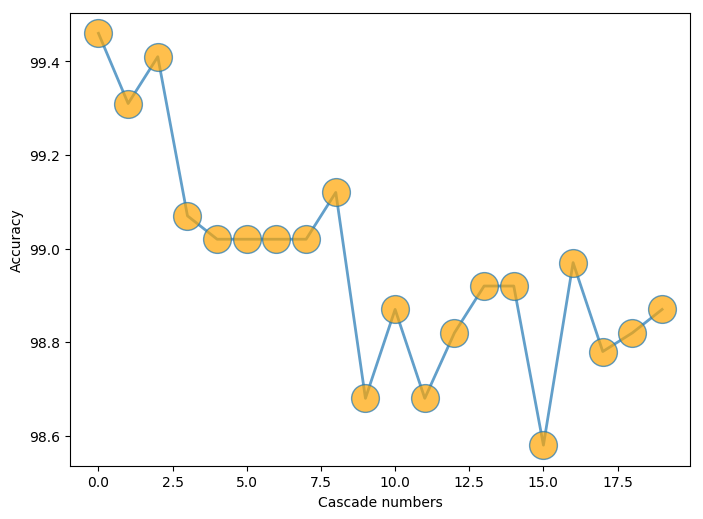

In [17]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [18]:
Accuracy

[99.46,
 99.31,
 99.41,
 99.07,
 99.02,
 99.02,
 99.02,
 99.02,
 99.12,
 98.68,
 98.87,
 98.68,
 98.82,
 98.92,
 98.92,
 98.58,
 98.97,
 98.78,
 98.82,
 98.87]